In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
"""Bayes factor plots"""
import sys
sys.path.extend(['.', '..'])

import numpy as np
from matplotlib import pyplot as plt

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    from sens import parse_args
    from utils import plot as plot_utils
    from utils.fr import SCALE_BOUNDARIES
    from utils.misc import get_units

import matplotlib2tikz

/home/smandalia/.local/lib/python2.7/site-packages/matplotlib2tikz/__init__.py:31: UserWarning: matplotlib2tikz has been renamed to tikzplotlib (which is Python-3-only). matplotlib2tikz will no longer be supported.
  warnings.warn("matplotlib2tikz has been renamed to tikzplotlib (which is Python-3-only). matplotlib2tikz will no longer be supported.")


In [3]:
DIM = 6
SC_010 = [(0, 1, 0), 'OET']
SC_100 = [(1, 0, 0), 'OUT']

DATADIR = '/data/user/smandalia/flavour_ratio/data/sensitivity/DIM{0}/bayesian/real/fr_stat_DIM{0}_sfr'.format(DIM)

SEGMENTS = 10

args_010 = parse_args('--dimension {0} --source-ratio {1} {2} {3} --stat-method bayesian'.format(DIM, *SC_010[0]))
args_100 = parse_args('--dimension {0} --source-ratio {1} {2} {3} --stat-method bayesian'.format(DIM, *SC_100[0]))

In [4]:
boundaries = SCALE_BOUNDARIES[DIM]
eval_scales = np.linspace(boundaries[0], boundaries[1], SEGMENTS-1)
eval_scales = np.concatenate([[-100.], eval_scales])

In [13]:
base_infile = DATADIR + '_{0}_{1}_{2}_'.format(*SC_010[0]) + SC_010[1] + '_scale_'

d_010 = []
for scale in eval_scales:
    infile = base_infile + '{0:.0E}'.format(np.power(10, scale)) + '.npy'
    d_010.append(np.load(infile)[0])
d_010 = np.dstack(d_010)[0]

lim_010 = plot_utils.get_limit(d_010[0], d_010[1], args_010, mask_initial=True)
sc, st = plot_utils.get_limit(d_010[0], d_010[1], args_010, mask_initial=True, return_interp=True)
d_010 = np.vstack([sc, st])

scales, stat [(-100.0, -29.555862612249648), (-56.0, -29.766019647372207), (-52.75, -29.623184822825394), (-49.5, -29.928550147551004), (-46.25, -30.610604313154642), (-43.0, -37.94956693781441), (-39.75, -40.40734055766876), (-36.5, -40.60191617254397), (-33.25, -40.302401793524595), (-30.0, -40.61265085007461)]
[reduced_ev > np.log(10**(BAYES_K))] 264
limit = -45.1082397392
scales, stat [(-100.0, -29.555862612249648), (-56.0, -29.766019647372207), (-52.75, -29.623184822825394), (-49.5, -29.928550147551004), (-46.25, -30.610604313154642), (-43.0, -37.94956693781441), (-39.75, -40.40734055766876), (-36.5, -40.60191617254397), (-33.25, -40.302401793524595), (-30.0, -40.61265085007461)]
[reduced_ev > np.log(10**(BAYES_K))] 264


In [15]:
base_infile = DATADIR + '_{0}_{1}_{2}_'.format(*SC_100[0]) + SC_100[1] + '_scale_'

d_100 = []
for scale in eval_scales:
    infile = base_infile + '{0:.0E}'.format(np.power(10, scale)) + '.npy'
    d_100.append(np.load(infile)[0])
d_100 = np.dstack(d_100)[0]
print d_100

lim_100 = plot_utils.get_limit(d_100[0], d_100[1], args_100, mask_initial=True)
sc, st = plot_utils.get_limit(d_100[0], d_100[1], args_100, mask_initial=True, return_interp=True)
d_100 = np.vstack([sc, st])

[[-100.          -56.          -52.75        -49.5         -46.25
   -43.          -39.75        -36.5         -33.25        -30.        ]
 [ -31.98570191  -31.93911116  -31.9159181   -31.26814871  -34.16971184
   -35.1842944   -35.26534428  -35.31729645  -35.24392331  -35.29710952]]
scales, stat [(-100.0, -31.9857019100975), (-56.0, -31.939111164736115), (-52.75, -31.915918104898985), (-49.5, -31.268148706631592), (-46.25, -34.16971184021791), (-43.0, -35.184294403803335), (-39.75, -35.26534428423956), (-36.5, -35.31729644732499), (-33.25, -35.24392330992847), (-30.0, -35.29710952128992)]
[reduced_ev > np.log(10**(BAYES_K))] 228
limit = -46.0829187287
scales, stat [(-100.0, -31.9857019100975), (-56.0, -31.939111164736115), (-52.75, -31.915918104898985), (-49.5, -31.268148706631592), (-46.25, -34.16971184021791), (-43.0, -35.184294403803335), (-39.75, -35.26534428423956), (-36.5, -35.31729644732499), (-33.25, -35.24392330992847), (-30.0, -35.29710952128992)]
[reduced_ev > np.log(10**(B

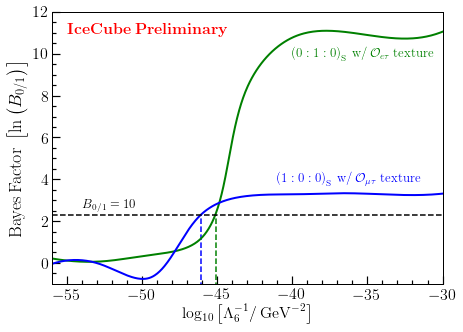

In [43]:
fontsize = 16

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)

ax.set_xlim(boundaries)
ax.set_ylim(-1, 12)

ax.set_xlabel(r'${\rm log}_{10}\left[\Lambda^{-1}_{'+ \
              r'{0}'.format(DIM)+r'}'+ \
              get_units(DIM)+r'\right]$', fontsize=fontsize)

ax.set_ylabel(r'$\text{Bayes\:Factor}\:\left[\text{ln}\left(B_{0/1}\right)\right]$')

ax.tick_params(axis='x', labelsize=fontsize, which='both', direction='in')
ax.tick_params(axis='y', labelsize=fontsize, which='both', direction='in')

ax.plot(d_010[0], d_010[1], color='g', lw=2, ls='-')
ax.text(
    -40, 9.7, r'$\left(0:1:0\right)_\text{S}\text{\:w/\:}\mathcal{O}_{e\tau}\text{\:texture}$',
    fontsize=fontsize-3, color='g'
)

ax.plot(d_100[0], d_100[1], color='b', lw=2, ls='-',)
ax.text(
    -41, 3.7, r'$\left(1:0:0\right)_\text{S}\text{\:w/\:}\mathcal{O}_{\mu\tau}\text{\:texture}$',
    fontsize=fontsize-3, color='b'
)

ax.axhline(y=np.log(10**(plot_utils.BAYES_K)), color='k', linewidth=1.5, ls='--')
ax.text(
    -54, 2.6, r'$B_{0/1}='+r'{0}$'.format(int(10**(plot_utils.BAYES_K))),
    fontsize=fontsize-3, color='k'
)
ax.vlines(lim_010, ymin=-10, ymax=np.log(10**plot_utils.BAYES_K), color='g', linewidth=1.5, linestyles='--')
ax.vlines(lim_100, ymin=-10, ymax=np.log(10**plot_utils.BAYES_K), color='b', linewidth=1.5, linestyles='--')

ax.text(
    -55, 11, r'${\rm\bf IceCube\:Preliminary}$', fontsize=fontsize, color='r'
)

matplotlib2tikz.save("plots/tex/bayes_factor.tex")